In [1]:
import glob
import pandas as pd
import itertools

In [2]:
# Global values

# prefix path of data location
path = "LDA_data/data/"

# Filepaths must be populated in the same order as these lists
# Could technically populate these from filenames but that removes flexibility and relies too much on filename
# Change these values to reflect actual tn or decay values
tn = ['10', '20', '30', '40', 'TNVar'] 
decay = ['00001','.001', '0.5', '0.75', '0.9']

# Define plot characteristics
# Change the values of the dict to change the axis labels
y_label = {"purity":"Average Purity", "confidence":"Average Causality Confidence"}
x_label = {"iter":"Number of Iterations"}
title = {"tn":"With differnt Number of Topics (tn)", "decay":"With different decay rates (µ)"}
legend = {"tn":"tn = ", "decay":"decay = "}

# set y axis range buffer above and below plot. Larger value is smaller buffer
y_buffer = 3 # 3 or 4 is good value

# legend["tn"]

In [3]:
def draw_plot(path, variable, constant):
    """
    Input:
        path - prefix path of data location
        variable - the varying value. tn or decay.
        constant - the constant value. purity or decay. Y axis
        
    Upon call, method saves the required plot to "path" and draws the plot inline
    
    """
    # to manually pass file names
    # append relative file paths to filepaths
    #filepaths = ["LDA_data/data/Dpoint001baseline2.decay.purity.csv"]
    
    # Parse filepaths using glob 
    # Files have to be named correctly
    ###################################################################
    #### USE NAMING CONVENTION path/filename.variable.constant.csv ####
    ################################################################### 
    filepaths = glob.glob(path+"*."+variable+"."+constant+".csv")
    # print(filepaths)
        
    # Set dataframe headers based on grpah being plotted
    header = []
    if variable == "decay":
        for x in decay:
            header.append([legend["decay"]+x]) # modify this to change legend
    elif variable == "tn":
        for x in tn:
            header.append([legend["tn"]+x])
    
    
    # load dataframe from csv
    dfs = []
    for i, filename in enumerate(filepaths):
        dfs.append(pd.read_csv(filename, names = header[i] )) # read from csv and add header/name to each df
    df = pd.concat(dfs,axis = 1)
    
    # define plot markers 
    marker = itertools.cycle(('o', 'D', 'v', 's', 'P', '*', 'X')) # markers for each line

    
    # p = df.plot.line(title = title, xlabel = x_label, ylabel = y_label) # doesnt work in older version of pd
    # set plot characteristics
    p = df.plot.line(title = title[variable]) # using values defined in dict 
    p.set_xlabel(x_label["iter"])
    p.set_ylabel(y_label[constant])
    p.yaxis.grid(True)
    
    for i, line in enumerate(p.get_lines()): # set marker for each line in plot
        line.set_marker(next(marker))
    
    # Setting y axis range buffer. Leave this in or comment out. Only affects the visual of the plot
    y_range = (p.get_ylim()[1] - p.get_ylim()[0])/y_buffer
    ylim = [p.get_ylim()[0]- y_range, p.get_ylim()[1]+y_range]
    p.set_ylim(ylim)
    
    
    # save plot to disk
    p.get_figure().savefig(path+variable+constant+".pdf")
    
    return

In [4]:
### Call these methods to draw plots ###    
def plot_decay(path):
    draw_plot(path, "decay", "purity")
    draw_plot(path, "decay", "confidence")
    return
    
def plot_tn(path):
    draw_plot(path, "tn", "purity")
    draw_plot(path, "tn", "confidence")
    return

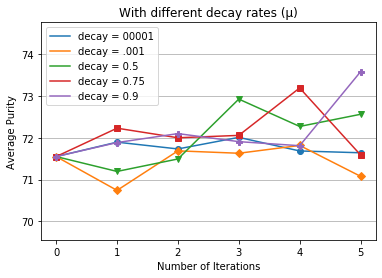

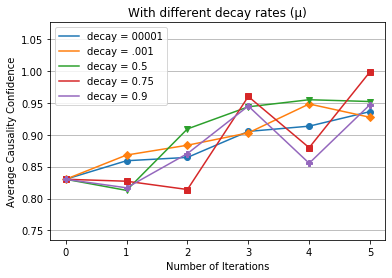

In [5]:
plot_decay(path)

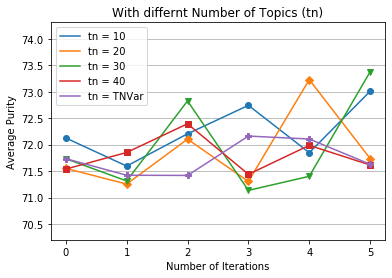

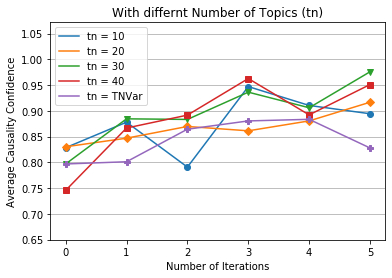

In [6]:
plot_tn(path)